DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone

Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.



In [33]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install wordcloud
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
from gensim.models import LdaModel
from gensim import corpora
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Read and display the dataset
df = pd.read_csv("/content/drive/My Drive/DeepLearning_Simili/Projects/Data Science/Comcast_telecom_complaints_data 2.csv")
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'date_index'],
      dtype='object')

In [3]:
#- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
df["date_index"] = df["Date_month_year"] + " " + df["Time"]
df["date_index"] = pd.to_datetime(df["date_index"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

In [5]:
df.dtypes


Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
date_index                     object
dtype: object

In [6]:
df = df.set_index(df["date_index"])
df.head(3)


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
22-Apr-15 3:53:50 PM,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-Apr-15 3:53:50 PM
04-Aug-15 10:22:56 AM,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-Aug-15 10:22:56 AM
18-Apr-15 9:55:47 AM,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-Apr-15 9:55:47 AM


In [7]:
df["Date_month_year"].value_counts()[:3]


24-Jun-15    218
23-Jun-15    190
25-Jun-15     98
Name: Date_month_year, dtype: int64

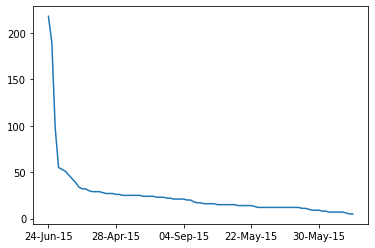

In [8]:
df["Date_month_year"].value_counts().plot();


In [9]:
df.Status.unique()


array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [16]:
#- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

df["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]
df.head(3)


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,newStatus
date_index,,,,,,,,,,,,,
22-Apr-15 3:53:50 PM,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-Apr-15 3:53:50 PM,Closed
04-Aug-15 10:22:56 AM,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-Aug-15 10:22:56 AM,Closed
18-Apr-15 9:55:47 AM,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-Apr-15 9:55:47 AM,Closed


In [13]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[:5]


,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [15]:
# - Provide a table with the frequency of complaint types.
Status_complaints = df.groupby(["State","newStatus"]).size().unstack().fillna(0)
Status_complaints.head()

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


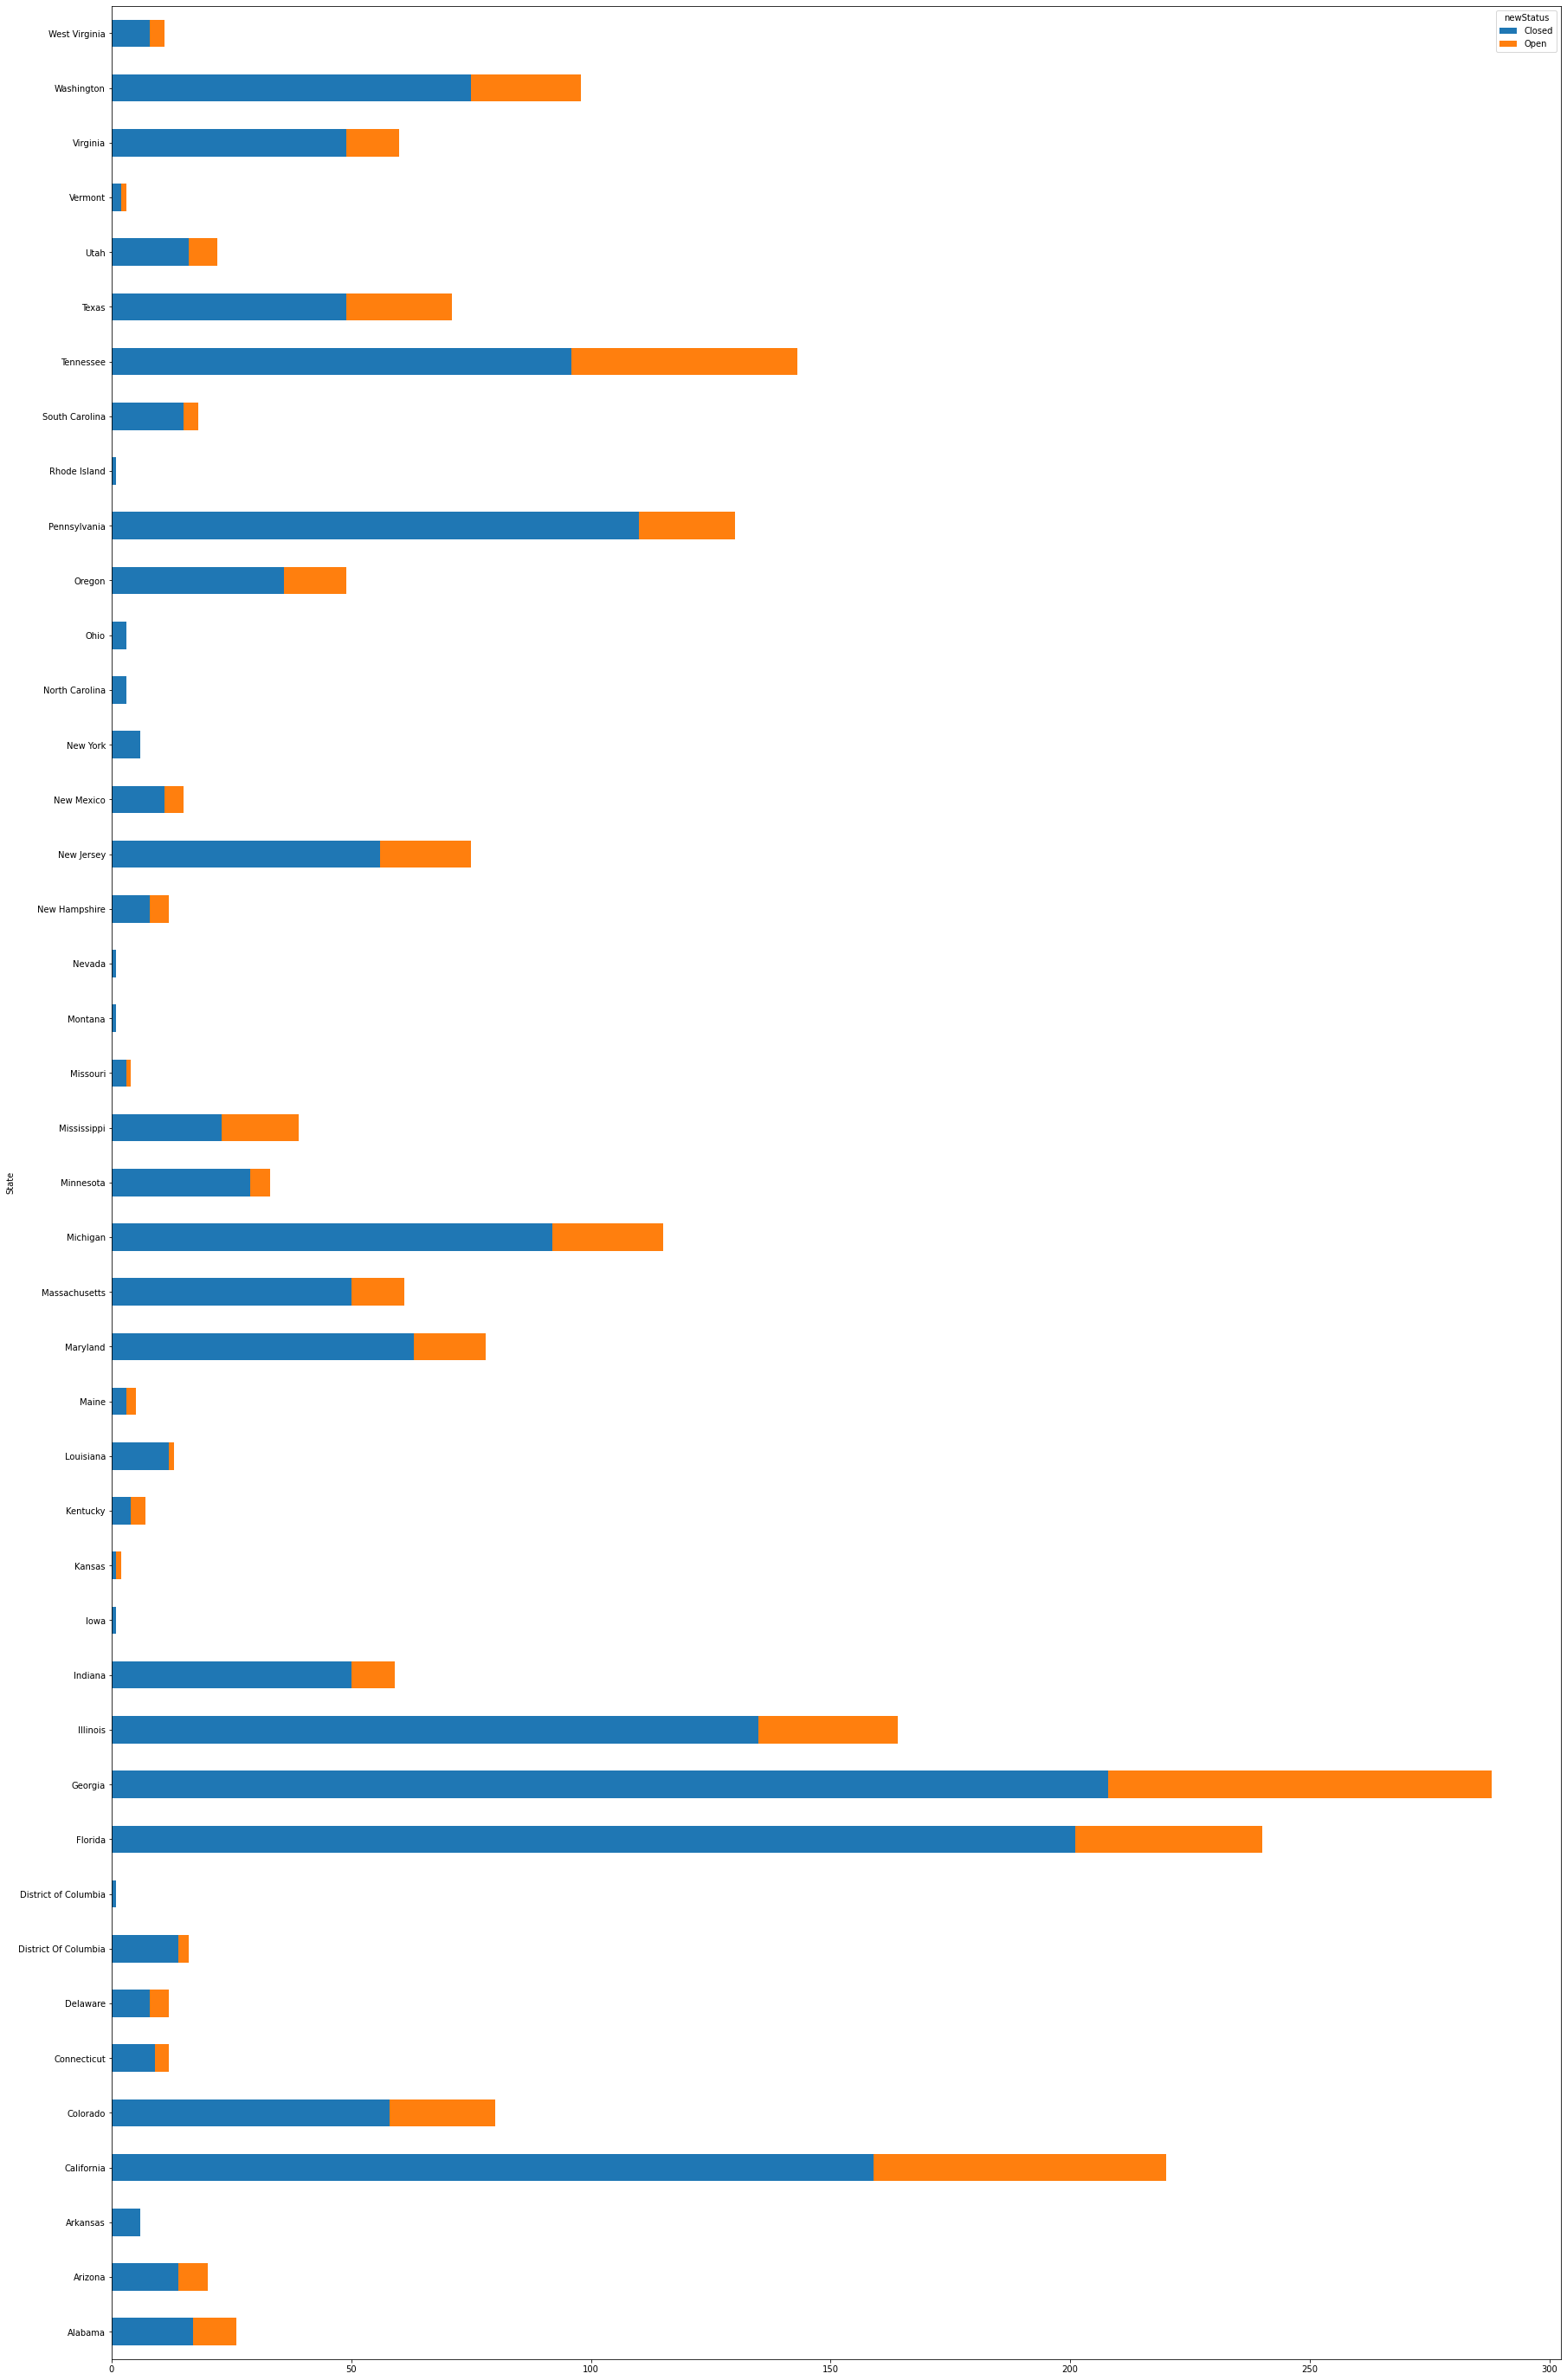

In [17]:
# - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Status_complaints.plot(kind="barh", figsize=(30,50), stacked=True)


In [18]:
# Which state has the maximum complaints
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()


State    West Virginia
Count              288
dtype: object

In [19]:
df.groupby(["State","newStatus"]).size().unstack().fillna(0).max()


newStatus
Closed    208.0
Open       80.0
dtype: float64

In [24]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [26]:
# Cleaning the data

def clean(doc):
    stop_free = " ".join([w for w in doc.lower().split() if w not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalised

In [29]:
doc_complete = df["Customer Complaint"].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

In [31]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [32]:
# Using bag of word to create the vectors
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [34]:
Num_Topic = 9
ldamodel = LdaModel(doc_term_matrix, num_topics= Num_Topic, id2word= dictionary, passes= 30)

In [35]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.122*"service" + 0.099*"comcast" + 0.063*"customer" + 0.060*"internet" + 0.040*"cable" + 0.039*"xfinity" + 0.035*"issue" + 0.027*"problem" + 0.016*"get" + 0.013*"3"')

(1, '0.165*"data" + 0.133*"cap" + 0.106*"comcast" + 0.045*"internet" + 0.031*"usage" + 0.020*"price" + 0.016*"connection" + 0.015*"outage" + 0.014*"switch" + 0.014*"overage"')

(2, '0.155*"service" + 0.146*"comcast" + 0.074*"internet" + 0.048*"complaint" + 0.023*"without" + 0.014*"business" + 0.014*"high" + 0.012*"charging" + 0.011*"billed" + 0.009*"fee"')

(3, '0.273*"comcast" + 0.121*"charge" + 0.024*"show" + 0.020*"help" + 0.015*"unauthorized" + 0.012*"scam" + 0.012*"regarding" + 0.011*"installation" + 0.011*"misleading" + 0.011*"cable"')

(4, '0.081*"comcast" + 0.067*"bill" + 0.063*"service" + 0.061*"internet" + 0.034*"day" + 0.020*"terrible" + 0.020*"cramming" + 0.018*"intermittent" + 0.015*"signal" + 0.013*"shitty"')

(5, '0.067*"comcast" + 0.040*"comcastxfinity" + 0.037*"monopolistic" + 0.028*"credit" + 0.02

In [37]:
word_dict = {}
for i in range(Num_Topic):
    words = ldamodel.show_topic(i, topn =20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [38]:
pd.DataFrame(word_dict)


,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,service,data,service,comcast,comcast,comcast,service,internet,billing
1,comcast,cap,comcast,charge,bill,comcastxfinity,poor,speed,comcast
2,customer,comcast,internet,show,service,monopolistic,comcast,comcast,practice
3,internet,internet,complaint,help,internet,credit,contract,issue,unfair
4,cable,usage,without,unauthorized,day,back,monopoly,slow,service
5,xfinity,price,business,scam,terrible,bill,fee,throttling,pricing
6,issue,connection,high,regarding,cramming,modem,monthly,pay,fraudulent
7,problem,outage,charging,installation,intermittent,xfinitycomcast,payment,failure,account
8,get,switch,billed,misleading,signal,please,sale,paying,complaint
9,3,overage,fee,cable,shitty,option,xfinity,equipment,email
